# **EDA**
**Exploratory Data Analysis**

**DATA Cleaning**

The data cleaning process involves systematically preparing three datasets (Customers.csv, Products.csv, and Transactions.csv) for analysis by addressing missing values, duplicates, and data inconsistencies. Missing values in the Customers dataset (e.g., CustomerName and Region) are replaced with "Unknown", while missing Price values in the Products dataset are filled with the mean to maintain data completeness. Rows with missing TotalValue in the Transactions dataset are dropped to ensure all transactions have complete financial data. Duplicate rows across all datasets are removed, ensuring unique records and preventing redundancy. Additionally, date columns such as SignupDate and TransactionDate are converted to datetime format for accurate time-based calculations.

The cleaned datasets are verified using the info() method, which confirms the absence of missing values and the presence of appropriate data types. After the cleaning process, the datasets are saved as new files (Cleaned_Customers.csv, Cleaned_Products.csv, and Cleaned_Transactions.csv) for future analysis tasks. This comprehensive cleaning ensures that the datasets are reliable, consistent, and ready for downstream processes like exploratory data analysis (EDA), clustering, and modeling. By standardizing and validating the data, this process lays the foundation for accurate insights and meaningful results.

In [ ]:
import pandas as pd

# Load your datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

print("Missing values in Customers Data:")
print(customers.isnull().sum())
print("\nMissing values in Products Data:")
print(products.isnull().sum())
print("\nMissing values in Transactions Data:")
print(transactions.isnull().sum())

customers.fillna({'CustomerName': 'Unknown', 'Region': 'Unknown'}, inplace=True)
products['Price'].fillna(products['Price'].mean(), inplace=True)
transactions.dropna(subset=['TotalValue'], inplace=True)

customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

print("\nCleaned Customers Data:")
print(customers.info())
print("\nCleaned Products Data:")
print(products.info())
print("\nCleaned Transactions Data:")
print(transactions.info())

customers.to_csv('/content/Cleaned_Customers.csv', index=False)
products.to_csv('/content/Cleaned_Products.csv', index=False)
transactions.to_csv('/content/Cleaned_Transactions.csv', index=False)

print("Data cleaning complete and files saved!")


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

<ipython-input-4-4295102802e6>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['Price'].fillna(products['Price'].mean(), inplace=True)


**Descriptive Statistics:**

The descriptive statistics highlight key patterns in the Products, Transactions, and Customers datasets. In the Products dataset, prices range from $16.08 to $497.76, with an average price of $267.55, showing moderate variability as indicated by the standard deviation of $143.22. Among the 100 unique products, Books and Electronics dominate the categories, each contributing 26 products, while Clothing and Home Decor follow closely. These findings suggest a potential focus on Books and Electronics, which could reflect customer preferences or strategic priorities for the store.

The Transactions dataset reveals significant variation in transaction values, with amounts ranging from $16.08 to $1,991.04 and an average of $689.99, indicating diverse purchasing behaviors. Customers from South America dominate the Customers dataset, contributing 59 of the total 200 customers, while Europe, North America, and Asia have fairly balanced representation. The dataset also shows active engagement from certain customers, such as C0109, who completed 11 transactions, and product P059, which was purchased 19 times. These patterns provide actionable insights for targeted marketing, customer segmentation, and optimizing inventory for popular products and regions.


In [ ]:
import pandas as pd

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

print("Descriptive Statistics for Products Data:")
print(products.describe(include=[np.number]))

print("\nDescriptive Statistics for Transactions Data:")
print(transactions.describe(include=[np.number]))

print("\nDescriptive Statistics for Customers Data:")
print(customers.describe(include=[object, 'category']))

print("\nDescriptive Statistics for Products Data (Categorical):")
print(products.describe(include=[object, 'category']))

print("\nDescriptive Statistics for Transactions Data (Categorical):")
print(transactions.describe(include=[object, 'category']))

print("\nFrequency Counts for Customer Regions:")
print(customers['Region'].value_counts())

print("\nFrequency Counts for Product Categories:")
print(products['Category'].value_counts())


Descriptive Statistics for Products Data:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Descriptive Statistics for Transactions Data:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

Descriptive Statistics for Customers Data:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59       

# Data Visualization and Business Insights

 1. Distribution of Product Prices:
 Product prices range from $16 to $500, with a concentration around $300-$400.
 Insight: The pricing strategy caters to mid-range customers, with potential opportunities to target budget and premium buyers.

 2. Distribution of Quantity Sold:
 Quantities sold per transaction are evenly distributed between 1 and 4 items.
 Insight: Customers often purchase multiple items, suggesting opportunities for cross-selling or bulk discounts.

 3. Box Plots of Product Prices and Transaction Values:
 Product prices and transaction values show wide ranges, with transaction values peaking around $1,000.
 Insight: High transaction values indicate opportunities to target high-value customers with personalized offers.

 4. Customer Distribution by Region:
 South America has the largest customer base, followed by Europe, North America, and Asia.
 Insight: Focus on South America for marketing while exploring growth opportunities in other regions.

 5. Product Distribution by Category:
 Books and Electronics dominate product categories, with balanced representation across all categories.
 Insight: Expand inventory and promotions in Books and Electronics while diversifying Home Decor and Clothing.

 6. Relationship Between Price and Quantity Sold:
 Quantities sold remain steady across all price ranges, including high-priced items.
 Insight: High-priced products sell in bulk, highlighting the importance of balancing affordability with premium offerings.

# Business Insights:
 1. Focus marketing efforts in South America and explore growth in other regions.
 2. Cater to mid-range pricing while targeting budget and premium segments.
 3. Promote cross-selling and bulk discounts to maximize transaction sizes.
 4. Expand Books and Electronics offerings and target high-value customers with personalized campaigns.


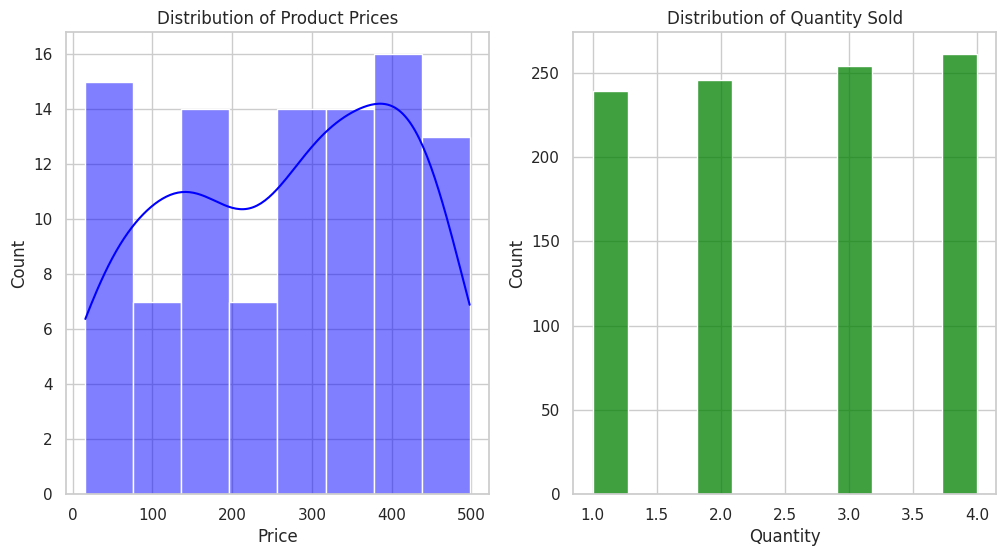

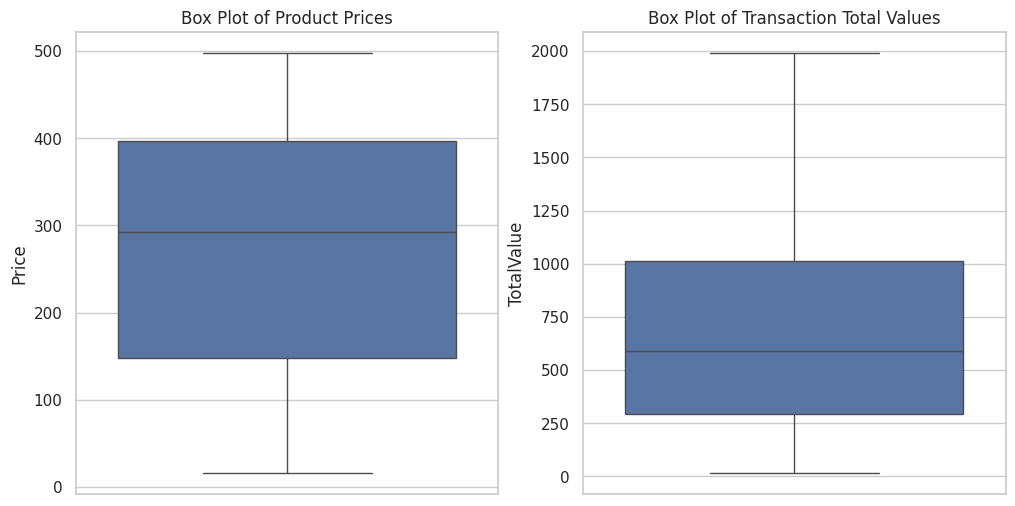

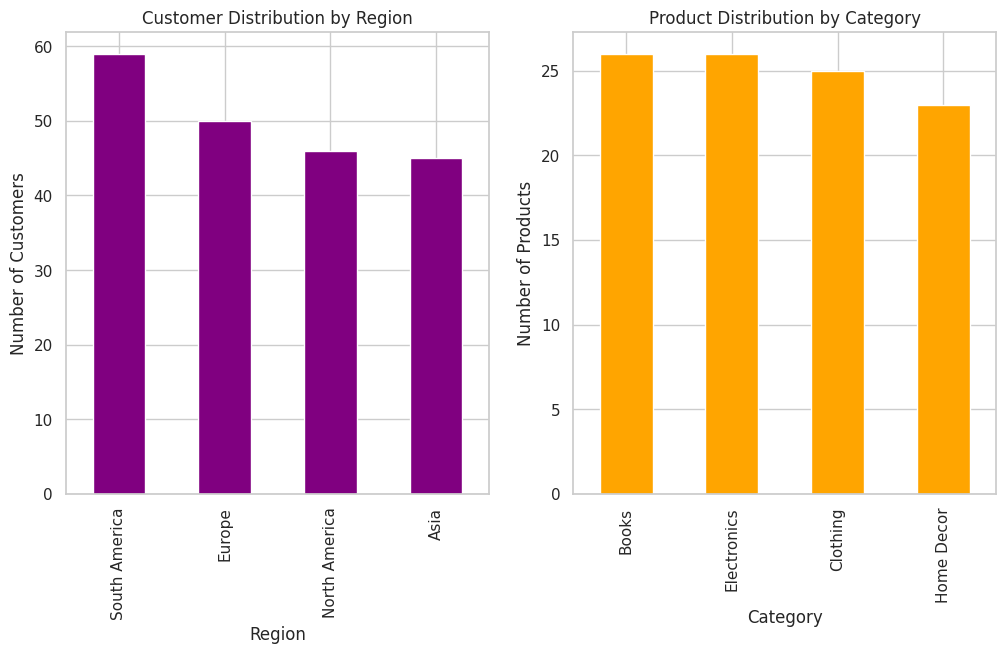

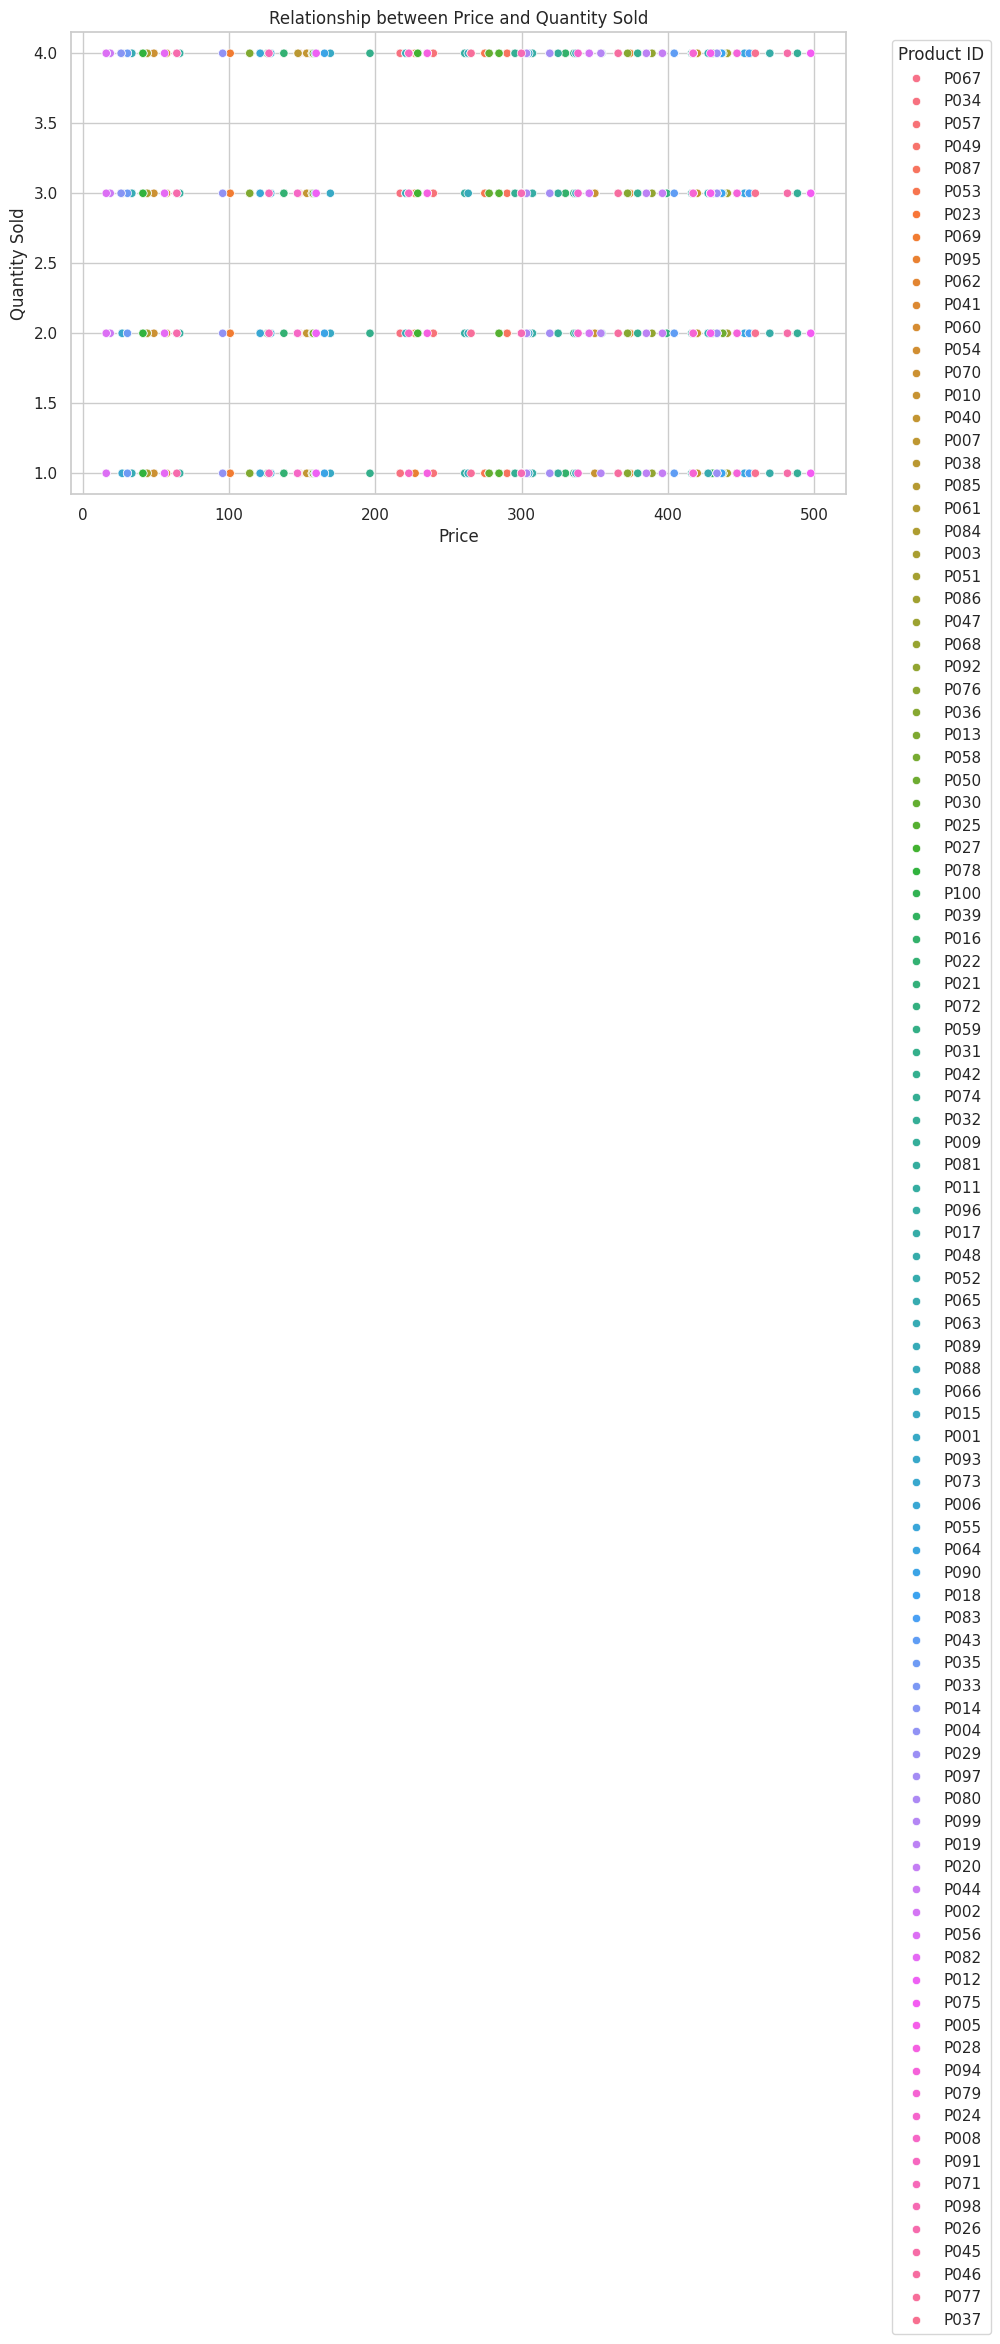

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(products['Price'], kde=True, color='blue')
plt.title('Distribution of Product Prices')

plt.subplot(1, 2, 2)
sns.histplot(transactions['Quantity'], kde=False, color='green')
plt.title('Distribution of Quantity Sold')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=products['Price'])
plt.title('Box Plot of Product Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=transactions['TotalValue'])
plt.title('Box Plot of Transaction Total Values')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
customers['Region'].value_counts().plot(kind='bar', color='purple')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
products['Category'].value_counts().plot(kind='bar', color='orange')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity', data=transactions, hue='ProductID')
plt.title('Relationship between Price and Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Bivariate and Multivariate Analysis:

 1. Correlation Matrix of Transactions Data:
 - The heatmap shows a strong positive correlation (0.72) between 'Price' and 'TotalValue'.
 - 'Quantity' also positively correlates with 'TotalValue' (0.61), indicating that higher quantities and prices contribute to transaction values.
 - 'Price' and 'Quantity' have no significant correlation (-0.01), suggesting independent behaviors.

 2. Scatter Plot of Price vs Quantity Sold:
 - The scatter plot indicates that the quantity sold remains consistent (1 to 4) across different price ranges.
 - Insight: Higher-priced products sell in similar quantities to lower-priced products, showing steady demand for premium items.

 3. Pair Plot of Selected Transaction Metrics:
 - The pair plot highlights linear relationships between 'Price', 'Quantity', and 'TotalValue'.
 - Insight: 'TotalValue' increases proportionally with both 'Price' and 'Quantity', confirming their combined impact on transaction values.

 4. Cross Tabulation between Region and Product Category:
 - The crosstab highlights the distribution of product categories purchased across regions.
 - Insight: Different regions have varying preferences, which can guide region-specific inventory and marketing strategies.

# Business Implications:
 - Focus on maintaining diverse price points since demand for premium products remains consistent across quantities.
 - Develop targeted marketing strategies based on regional product preferences and prioritize products contributing to high transaction values.


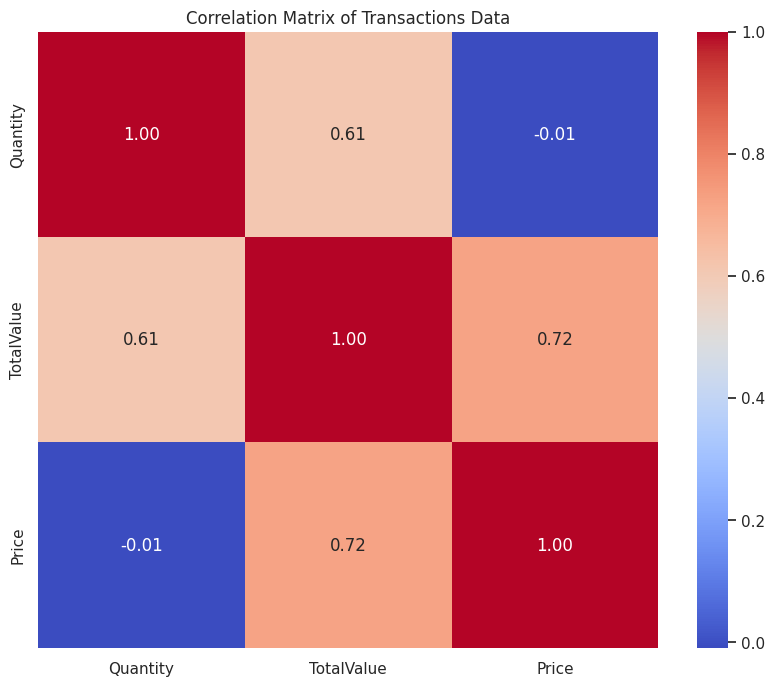


Cross Tabulation between Region and Product Category:
Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia               6         4            4           6
Europe             7         8            6           6
North America      7         9            9           4
South America      6         4            7           7


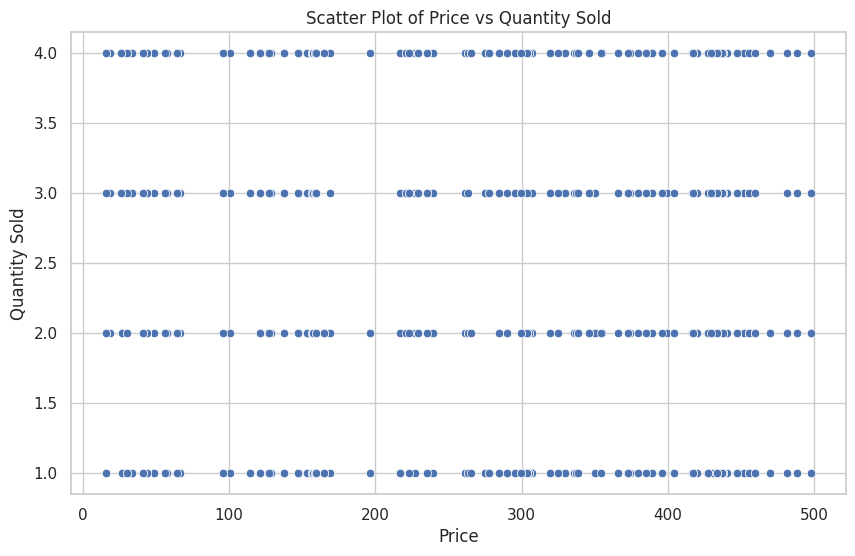

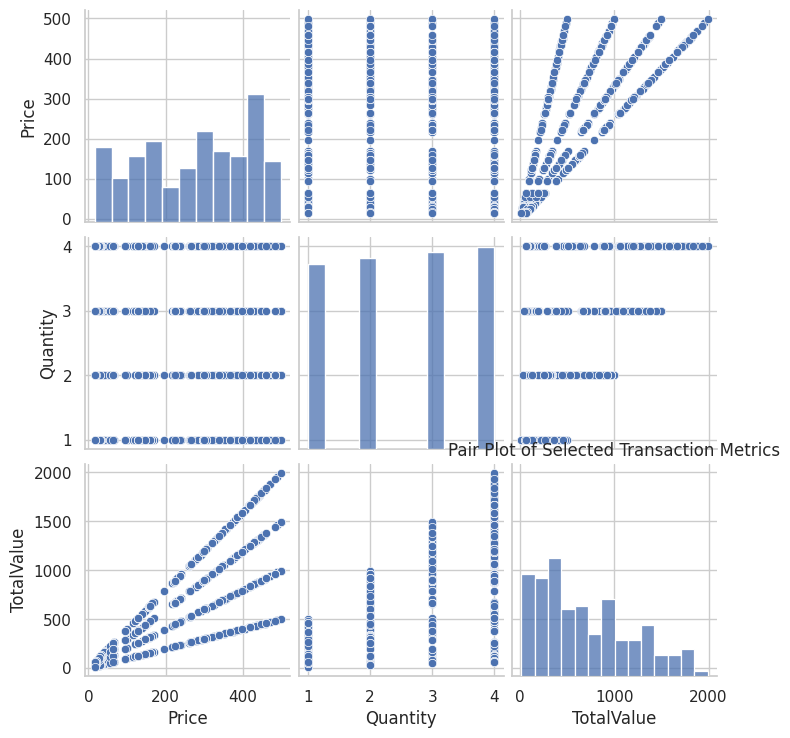

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

numerical_cols = transactions.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(transactions[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Transactions Data')
plt.show()

region_category_ct = pd.crosstab(index=customers['Region'], columns=products['Category'])
print("\nCross Tabulation between Region and Product Category:")
print(region_category_ct)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Price', y='Quantity')
plt.title('Scatter Plot of Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

sns.pairplot(transactions[['Price', 'Quantity', 'TotalValue']])
plt.title('Pair Plot of Selected Transaction Metrics')
plt.show()


# Temporal Analysis - Time Series Trends

 1. Daily Sales Trend:
 - The line plot shows daily total sales over time, highlighting fluctuations in revenue throughout the year.
 - Insight: Sales activity is highly variable, with frequent spikes indicating peak sales days.

 2. Observations:
 - The pattern suggests regular periods of increased sales, potentially during promotions, weekends, or holidays.
 - Insight: Identifying the specific dates of sales spikes can help optimize marketing campaigns or inventory for future high-demand periods.

 3. Business Implications:
 - Use time-series analysis to forecast future sales trends and prepare for anticipated high-demand periods.
 - Implement targeted promotions or campaigns during expected low-sales days to stabilize revenue.


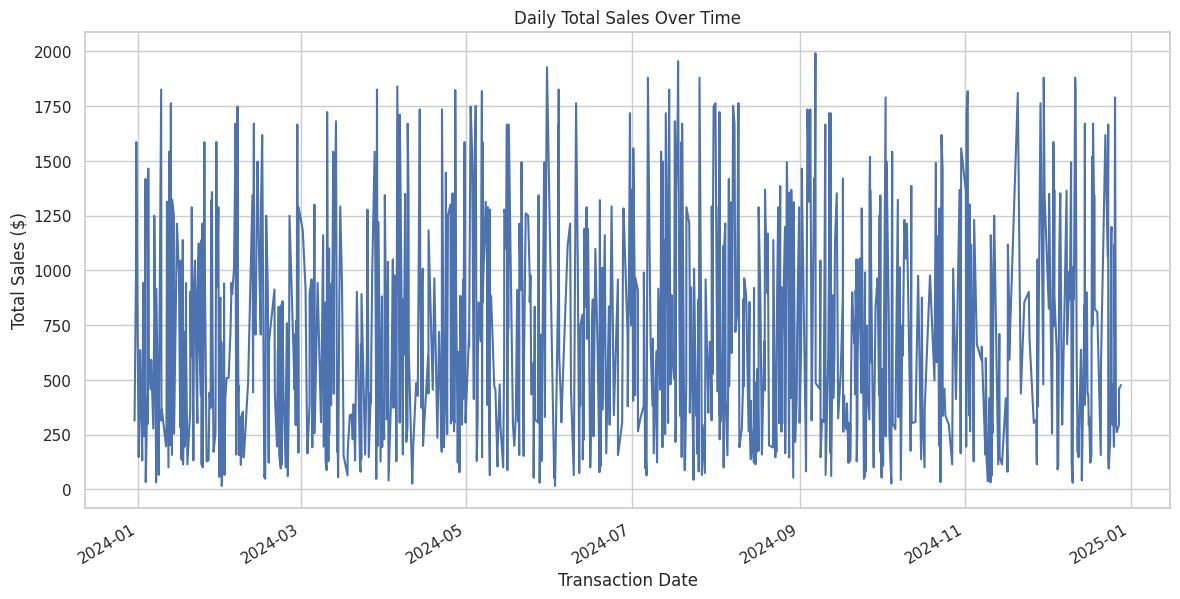

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

transactions = pd.read_csv('Cleaned_Transactions.csv')

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(14, 7))
daily_sales.plot(title='Daily Total Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()


# Cohort Analysis Explanation:

 1. Retention Trends:
 - The heatmap shows customer retention rates across cohorts over time (months after the first purchase).
 - Cohorts start with 100% retention in the first month, and retention generally declines in subsequent months.

 2. Key Observations:
 - Cohorts from early 2024 (e.g., March and April) demonstrate relatively higher retention in later months (e.g., 30%-53%).
 - Some months, like May and June 2024, show irregular retention spikes (e.g., 80% in June, Period 2), likely due to effective campaigns or promotions.
 - Recent cohorts (e.g., late 2024) show limited data but exhibit retention drops beyond the first month.

# Business Insights:

 1. Improve Early Retention:
 - Focus on retaining customers in the first 1-3 months after signup, as this period shows the steepest decline.
 - Implement onboarding strategies like discounts, loyalty rewards, or personalized recommendations to improve retention.

 2. Analyze Successful Cohorts:
 - Examine why certain cohorts (e.g., March and April 2024) retain better in later periods.
 - Replicate successful strategies such as promotions or improved customer engagement for new cohorts.

 3. Boost Retention During Drop-Offs:
 - Address retention drop-offs by re-engaging lapsed customers with tailored offers during months with steep declines.

 4. Plan Based on Seasonal Trends:
 - Leverage months showing higher retention (e.g., May-June 2024) for targeted campaigns and align inventory or services accordingly.

 5. Data Gaps in Recent Cohorts:
 - Monitor recent cohorts (e.g., September-December 2024) to understand emerging trends and develop proactive retention strategies.


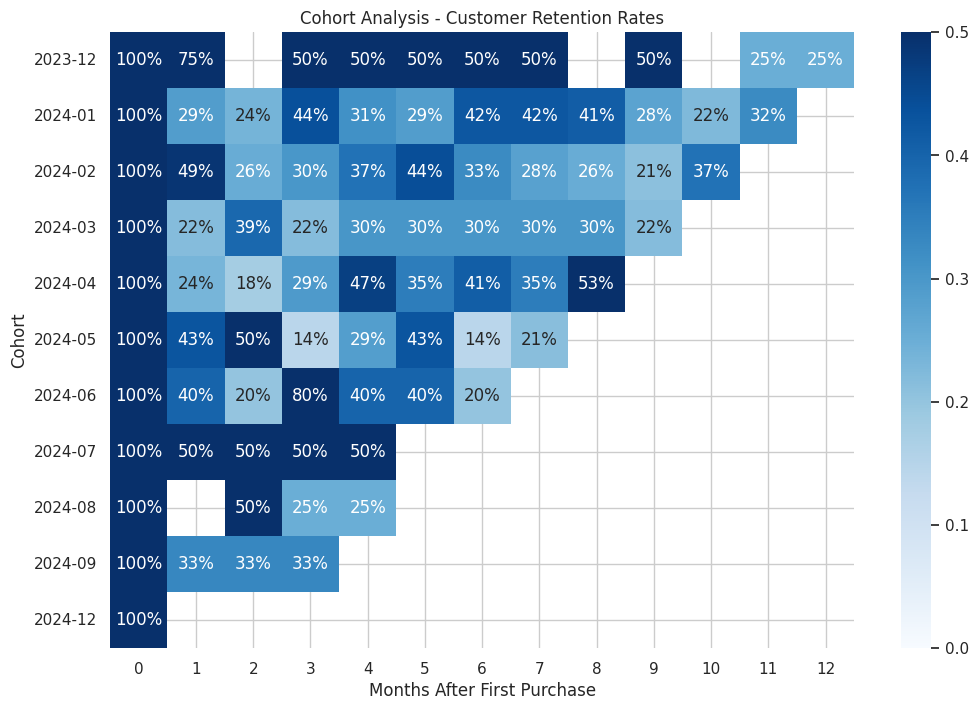

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter

customers = pd.read_csv('Cleaned_Customers.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate']).dt.to_period('M')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions = transactions.merge(customers[['CustomerID', 'SignupDate']], on='CustomerID')

transactions['OrderMonth'] = transactions['TransactionDate'].dt.to_period('M')
transactions['Cohort'] = transactions.groupby('CustomerID')['TransactionDate'].transform('min').dt.to_period('M')

cohort_data = transactions.groupby(['Cohort', 'OrderMonth']).agg(n_customers=('CustomerID', 'nunique')).reset_index()

cohort_data['PeriodNumber'] = (cohort_data['OrderMonth'] - cohort_data['Cohort']).apply(attrgetter('n'))

cohort_pivot = cohort_data.pivot_table(index='Cohort', columns='PeriodNumber', values='n_customers')

cohort_sizes = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', vmin=0.0, vmax=0.5)
plt.title('Cohort Analysis - Customer Retention Rates')
plt.ylabel('Cohort')
plt.xlabel('Months After First Purchase')
plt.show()